In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('ml_data/classification_data.csv')
data.head()

,BookID,Raters,Reviewers,Pages,PublishYear,review
0,1,2469197,40043,652.0,2005,2
1,2,2541611,43067,870.0,2003,2
2,3,7145889,113905,309.0,1997,2
3,4,2766218,53651,352.0,1998,2
4,5,2849671,56337,435.0,1999,2


In [4]:
info = data[['Raters', 'Reviewers', 'Pages', 'PublishYear']]
labels = data.review

In [13]:
info_train, info_test, labels_train, labels_test = train_test_split(info, labels, train_size = 0.8, test_size = 0.2, random_state=42)

classifier = DecisionTreeClassifier(random_state = 42, max_depth = 4)
classifier.fit(info_train, labels_train)

predict = classifier.predict(info_test)

In [9]:
test_labels = labels_test.values.tolist()

result_matrix = np.zeros((3, 3), dtype='int32')
correct = 0

for i in range(len(test_labels)):
    result_matrix[test_labels[i]][predict[i]] += 1
    
    if predict[i] == test_labels[i]:
        correct += 1

print(result_matrix)
print(correct/len(test_labels))

[[    0    92   182]
 [    3   992  4854]
 [    4   997 12397]]
0.6858767481174121


[Text(167.4, 195.696, 'X[2] <= 416.5\ngini = 0.439\nsamples = 78083\nvalue = [1075, 23391, 53617]'),
 Text(83.7, 152.208, 'X[0] <= 1721.5\ngini = 0.459\nsamples = 64540\nvalue = [1002, 20993, 42545]'),
 Text(41.85, 108.72, 'X[2] <= 80.5\ngini = 0.483\nsamples = 47856\nvalue = [921, 17041, 29894]'),
 Text(20.925, 65.232, 'X[0] <= 181.5\ngini = 0.364\nsamples = 4575\nvalue = [34, 1046, 3495]'),
 Text(10.4625, 21.744, 'gini = 0.446\nsamples = 1503\nvalue = [21, 464, 1018]'),
 Text(31.387500000000003, 21.744, 'gini = 0.314\nsamples = 3072\nvalue = [13, 582, 2477]'),
 Text(62.775000000000006, 65.232, 'X[3] <= 1994.5\ngini = 0.491\nsamples = 43281\nvalue = [887, 15995, 26399]'),
 Text(52.3125, 21.744, 'gini = 0.463\nsamples = 17703\nvalue = [217, 5968, 11518]'),
 Text(73.2375, 21.744, 'gini = 0.507\nsamples = 25578\nvalue = [670, 10027, 14881]'),
 Text(125.55000000000001, 108.72, 'X[2] <= 65.5\ngini = 0.369\nsamples = 16684\nvalue = [81, 3952, 12651]'),
 Text(104.625, 65.232, 'X[3] <= 1725.0

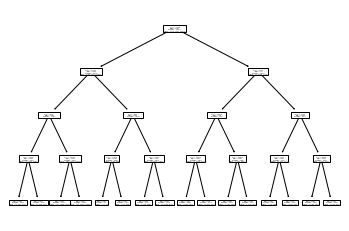

In [14]:
plot_tree(classifier)